# Scotch Whiskey analysis 

<li>Explanatory data analysis<br>
<li>Data preprocessing<br>
<li>Models<br>
<li>Conclusions<br>

# Data preprocessing

### Imports

In [458]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from IPython.display import display

### Helper functions

In [459]:
def load_dataset():
    """
    Function return the dataframe with the loaded data
    """
    filename = 'scotch.xlsx'
    filepath = 'Scotch data (Windows)\\'
    path = os.path.normpath(filepath + filename)
    df = pd.read_excel(path, header=None)  # skipping headers until better understanding of the dataset
    return df


def load_txt(txt_filename):
    """
    Function loads the txt file and return a dataframe with the data
    """
    filepath = 'Scotch data (Windows)\\'
    path = os.path.normpath(filepath + txt_filename)
    f = open(path, mode='rt', newline='\n')
    f.close()
    df = pd.read_csv(path, sep='')
    return df



def plot_bar_cat(columns, data, title):
    """
    Function plots cumulative sum of the values in a bar plot
    """
    sequence = df[columns].sum().sort_values(ascending=False)
    plt.figure(figsize=(15,5))
    plt.title(f'Whiskey '+ title, fontsize=16)
    sns.barplot(x=sequence.index, y=sequence)
    plt.xticks(rotation=45, fontsize=14)
    plt.show()
    pass


def plot_bar_num(columns, data, title):
    """
    Function plots counts of particular values in a bar plot
    """
    to_plot = data[columns].value_counts().sort_values(ascending=True)
    plt.figure(figsize=(15,5))
    plt.title(f'Whiskey ' + title, fontsize=16)
    sns.barplot(x=to_plot.index, y = to_plot)
    plt.ylabel('Count', fontsize=14)
    plt.show()
    pass

### Data exploration

The 'txt' files contain different categorical variables defining a particular whiskey from a distillery. The variables are one hot encoded values, apart from distilleries geo coordinates are provided in the DISTCOOR.txt. DIST-GEO.txt contains computed from one distillery to all others. scotch.xlsx seems to contain them agreggated but some seem to be missing and has one additional <b>score</b> which is most likely assigned value by a tester.

In [460]:
os.listdir('Scotch data (Windows)\\')

['BODY.TXT',
 'COLOR.TXT',
 'DIST-GEO.TXT',
 'DISTCOOR.TXT',
 'FINISH.TXT',
 'NOSE.TXT',
 'PALATE.TXT',
 'readme.txt',
 'REGIONS.TXT',
 'SCOTCH.TXT',
 'scotch.xlsx',
 '~$scotch.xlsx']

In [461]:
df = load_dataset()
display(df.head())
display(df.iloc[-5:,:])

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,NaN,NaN,color,color,color,color,color,color,color,color,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NAME,NaN,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
2,Aberfeldy,Aberfeldy,0,1,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
3,Aberlour,Aberlour,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
4,Ardberg,Ardberg,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
108,Tomintoul,Tomintoul,0,0,0,0,0,0,0,1,...,SPEY,0,0,1,0,0,0,0,0,0
109,Tormore,Tormore,0,0,0,0,0,0,0,1,...,SPEY,0,0,1,0,0,0,0,0,0
110,Tullibardine,Tullibardi,0,0,0,0,0,1,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,8,2,2,4,10,21,2,27,...,NaN,7,6,57,10,5,7,9,3,5


### Data cleaning

In [462]:
# fixing the columns names
df.columns = list(df.iloc[1,:])  # takes the names of columns in the 2nd row
df.columns = [str(x).lower() for x in df.columns]  # change the names to string to deal with nan value

# dropping redundand rows and columns
df = df.iloc[2:111,:]  # dropping rows containing nan and insignificant information
df.drop(labels=df.columns[1], axis=1, inplace=True)  # dropping columns that is a duplicate of the first
df.reset_index(inplace=True)  # resetting rows index
df.drop(labels=['index'], axis=1, inplace=True)

In [463]:
# changing th names of the columns

columns = df.columns
print(columns)

new_cols = []

color_columns = []
nose_columns = []
body_columns = []
pale_columns = []
finish_columns = []

for i, col in enumerate(columns):
    if (i>=1) & (i<=14):
        n_col = col + '_color'
        color_columns.append(n_col)
    elif (i>14) & (i<=27):
        n_col = col + '_nose'
        nose_columns.append(n_col)       
    elif (i>27) & (i<=34):
        n_col = col + '_body'
        body_columns.append(n_col) 
    elif (i>34) & (i<=49):
        n_col = col + '_pale'
        pale_columns.append(n_col) 
    elif (i>49) & (i<=68):
        n_col = col + '_finish'
        finish_columns.append(n_col)        
    else:
        n_col = col
        
    new_cols.append(n_col)

df.columns = new_cols

Index(['name', 'wyne', 'yellow', 'v.pale', 'pale', 'p.gold', 'gold', 'o.gold',
       'f.gold', 'bronze', 'p.amber', 'amber', 'f.amber', 'red', 'sherry',
       'aroma', 'peat', 'sweet', 'light', 'fresh', 'dry', 'fruit', 'grass',
       'sea', 'sherry', 'spicy', 'rich', 'soft', 'med', 'full', 'round',
       'smooth', 'light', 'firm', 'oily', 'full', 'dry', 'sherry', 'big',
       'light', 'smooth', 'clean', 'fruit', 'grass', 'smoke', 'sweet', 'spice',
       'oil', 'salt', 'arome', 'full', 'dry', 'warm', 'big', 'light', 'smooth',
       'clean', 'fruit', 'grass', 'smoke', 'sweet', 'spice', 'oil', 'salt',
       'arome', 'ling', 'long', 'very', 'quick', 'age', 'dist', 'score', '%',
       'region', 'district', 'islay', 'midland', 'spey', 'east', 'west',
       'north ', 'lowland', 'campbell', 'islands'],
      dtype='object')


### Features cleaning

In [464]:
# during exploration I have detected that numerical column age has negative values which might be an error 

new_values = []
for row in df.iterrows():
    if row[1]['age'] == -9:
        new_values.append(9)
    else:
        new_values.append(row[1]['age'])
        
df['age']=new_values

In [465]:
# during explodation detected whitespaces as part of names which will cause inproper encoding later on

    
df['region']=[s.strip() for s in df['region']]
df['district']=[s.strip() for s in df['district']]

In [466]:
# removing columns that do not hold numerical data in preparation of cleaning the values

cols_to_change = new_cols
cols_to_change.remove('region')
cols_to_change.remove('district')
cols_to_change.remove('name')

In [467]:
# changing numerical columns from object / string to int
for col in cols_to_change:
    df[col] = [int(x) for x in df[col]]

In [468]:
df[cols_to_change].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 81 columns):
wyne_color       109 non-null int64
yellow_color     109 non-null int64
v.pale_color     109 non-null int64
pale_color       109 non-null int64
p.gold_color     109 non-null int64
gold_color       109 non-null int64
o.gold_color     109 non-null int64
f.gold_color     109 non-null int64
bronze_color     109 non-null int64
p.amber_color    109 non-null int64
amber_color      109 non-null int64
f.amber_color    109 non-null int64
red_color        109 non-null int64
sherry_color     109 non-null int64
aroma_nose       109 non-null int64
peat_nose        109 non-null int64
sweet_nose       109 non-null int64
light_nose       109 non-null int64
fresh_nose       109 non-null int64
dry_nose         109 non-null int64
fruit_nose       109 non-null int64
grass_nose       109 non-null int64
sea_nose         109 non-null int64
sherry_nose      109 non-null int64
spicy_nose       109 non-null i

# EDA - Features

### Whiskey score

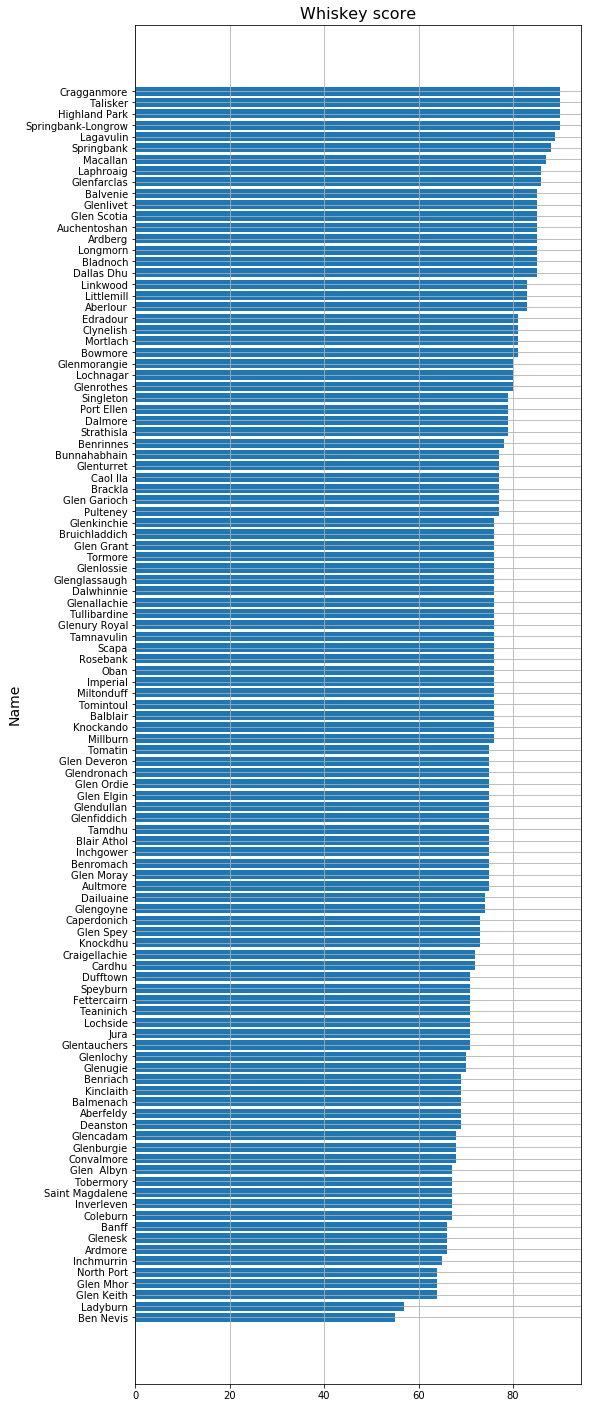

In [469]:
df.sort_values(by='score', axis=0, ascending=True, inplace=True)

plt.figure(figsize=(8,25))
plt.title('Whiskey score',fontsize=16)
plt.ylabel('Name', fontsize=14)
plt.grid()
plt.barh(width=df.score, y=df.name)
plt.show()

### Whiskey features

In [470]:
titles_cat = ['Color', 'Nose', 'Body', 'Pale', 'Finish']
col_list_cat = [color_columns, nose_columns, body_columns, pale_columns, finish_columns]

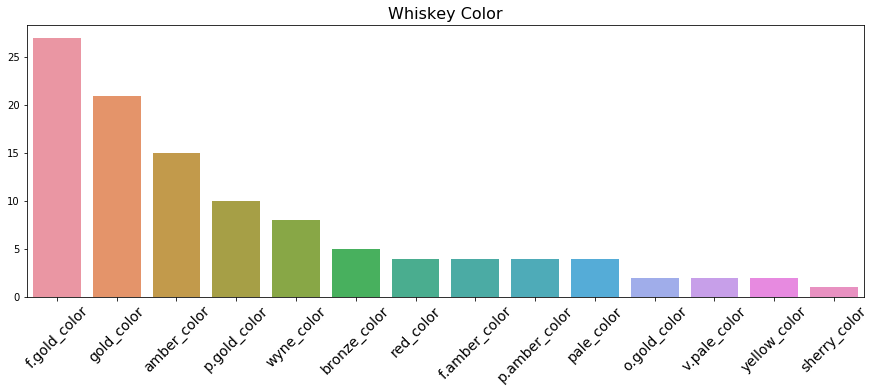

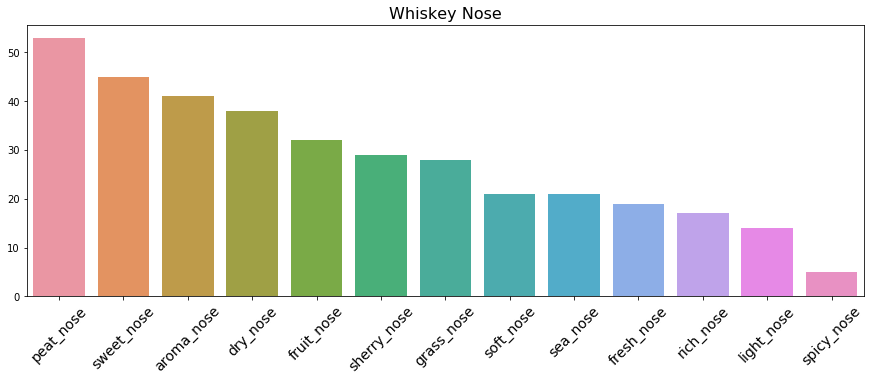

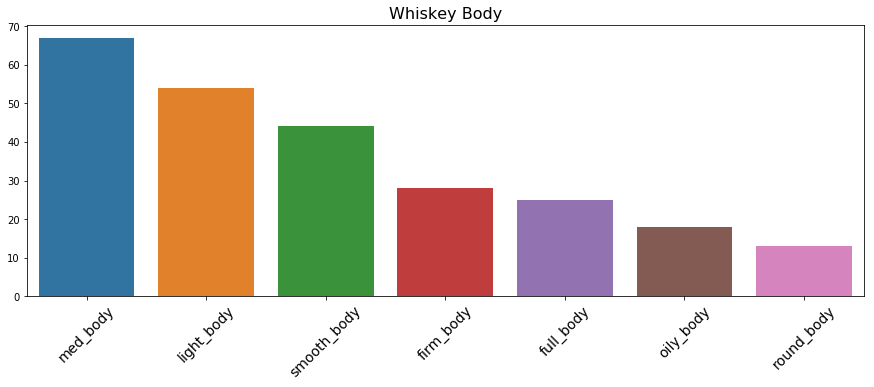

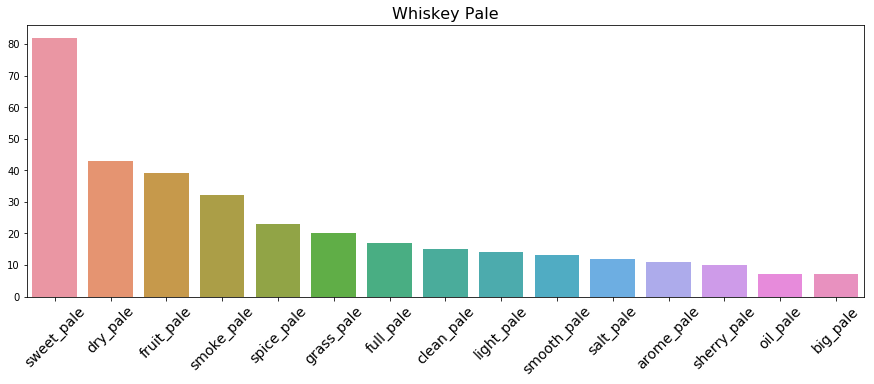

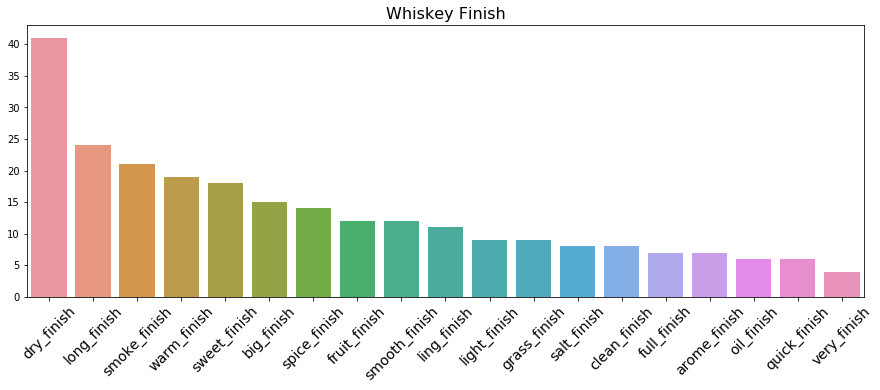

In [471]:
for i, item in enumerate(titles_cat):
    plot_bar_cat(col_list_cat[i], df, item)

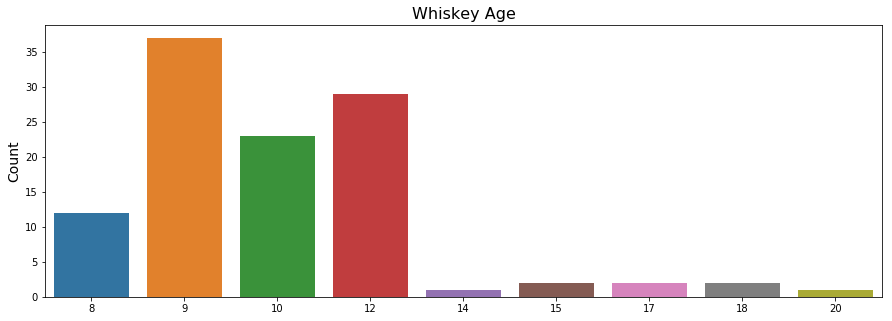

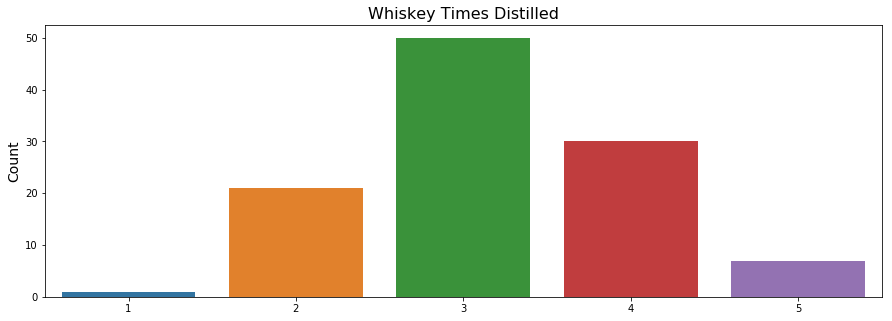

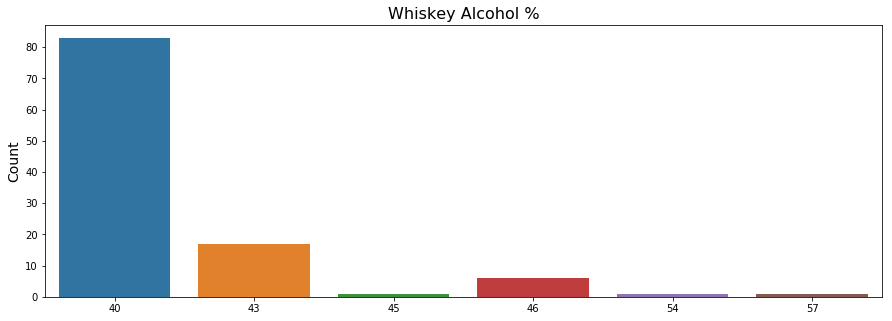

In [481]:
titles = ['Age', 'Times Distilled', 'Alcohol %']
cols = ['age', 'dist', '%']

for i, item in enumerate(titles):
    plot_bar_num(cols[i], df, item)

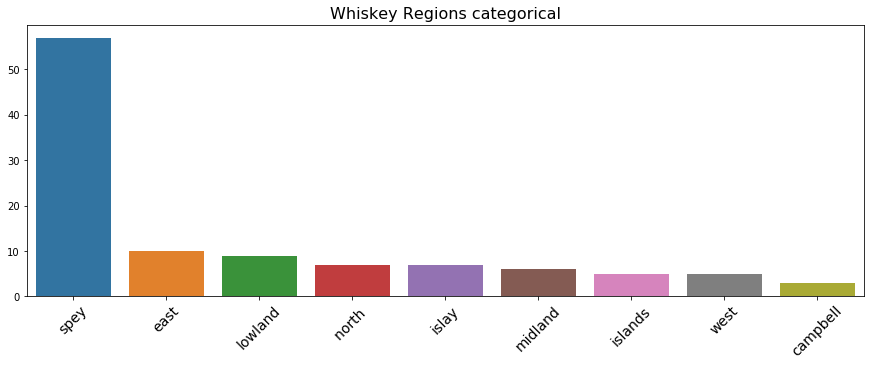

In [473]:
regions_cat = ['islay', 'midland', 'spey',
       'east', 'west', 'north ', 'lowland', 'campbell', 'islands']

plot_bar_cat(regions_cat, df, 'Regions categorical')

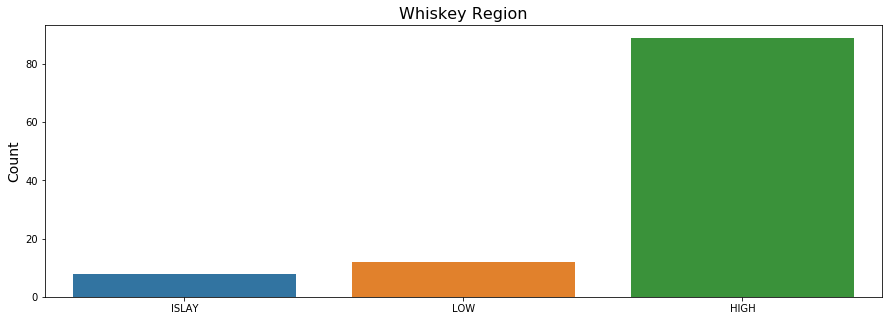

In [474]:
plot_bar_num('region', df, 'Region')

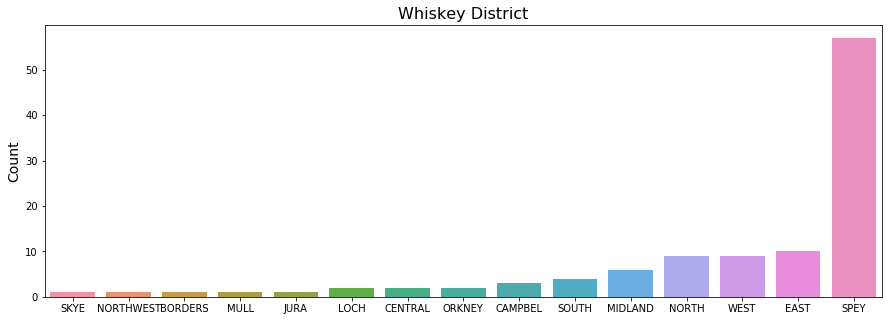

In [475]:
plot_bar_num('district', df, 'District')

### Checks

In [479]:
df[['age','%','score','dist']].describe()

,age,%,score,dist
count,109.000000,109.000000,109.000000,109.000000
mean,10.467890,41.128440,75.587156,3.192661
std,2.295603,2.617961,6.947170,0.855019
min,8.000000,40.000000,55.000000,1.000000
25%,9.000000,40.000000,71.000000,3.000000
50%,10.000000,40.000000,76.000000,3.000000
75%,12.000000,40.000000,79.000000,4.000000
max,20.000000,57.000000,90.000000,5.000000


In [482]:
len(df['district'].unique())

15

In [485]:
len(df.loc[df['district']=='SPEY'])/109*100

52.293577981651374

In [486]:
len(df.loc[df['region']=='HIGH'])/109*100

81.65137614678899

In [487]:
regions_cat = ['islay', 'midland', 'spey',
       'east', 'west', 'north ', 'lowland', 'campbell', 'islands']

0.0

In [488]:
df['spey'].sum()/109*100

52.293577981651374

In [489]:
df[regions_cat].sum()

islay        7
midland      6
spey        57
east        10
west         5
north        7
lowland      9
campbell     3
islands      5
dtype: int64

In [490]:
df.district.value_counts()

SPEY         57
EAST         10
NORTH         9
WEST          9
MIDLAND       6
SOUTH         4
CAMPBEL       3
LOCH          2
CENTRAL       2
ORKNEY        2
SKYE          1
NORTHWEST     1
BORDERS       1
MULL          1
JURA          1
Name: district, dtype: int64

## EDA summary

The dataset holds data for 109 whiskeys that come from different distilleries, regions and have different features that distinguish one from the other.<br> <br> The main categorical variables connected to the whiskey's taste are:
<li> Color with 14 levels, where gold color most frequent and sherry color least frequent
<li> Nose with 12 levels, where peat most frequent and spicy the least
<li> Body with 8 levels, where med most frequent and round the least
<li> Palate with 15 levels, where sweet most frequest and big the least (called Pale on plots)
<li> Finish with 19 levels, where dry finish most frequent and very finish the least <br><br>
Additionally, there are four numerical variables:
<li> Age with values from 8 to 20 years with mean age of ca. 10 years
<li> % with values from 40% to 57% and mean value of 41%
<li> 'dist' representing number of times the whiskey was distilled with values from 1 to 5, with 3 most frequent value
<li> score with values from 55 to 90 and mean values of ca. 75 <br><br>
Apart from that there exist a few categorical variables carrying information about the location of the distillery:
<li> Region with 3 levels, 'High' being the most frequent and 'Islay' the least frequent
<li> District with 15 levels, where 'Spey' is most frequent and 'Skye' the least
<li> Regions with 9 levels, 'Spey' the most frequent and 'Capbell' the least 
<br><br>
Additionally there exist a geo coordinates file with exact coordinates of the distilleries and a seperate one where distance from the given distillery is calculated to all other (1 x 109 vector). <br><br>
The information about locations seem repeated few times in different variables and also have a clear inbalance showing majority of the whiskeys being made in Spey (52%) per District variable and 9 level district variable, (~82%) are made in Highlands. As significant majority of the whiskeys are made in Highlands, the three levels may carry not sufficient information for further modelling. On the other hand, 9 level variable and 13 level variable seem to be consistent based on the contribution of the Spey made liqour in the set however there are a few districts that have just one whikey. Due to that I will assume for further analysis that 9 level variable is better choice and drop the remaining ones. <br><br> 
Future considerations: <br>
<li> Location could be replaced by east / west / south / north or similar buckets could be introduced to reduce imbalance in the variable
<li> Alcohol percentage could be replaced by categories
<li> Whiskey age also could be replaced by categories